There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.     
Business Objectives:     
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables.     
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
 Also build the Random Forest Regressor for optimal search of classifiers.    
Dataset: data1.csv    
Note : kindly build the project with following pointers
-		1.Data understanding and exploration
-		2.Data cleaning
-		3.Data preparation
-		4.Model building and evaluation
-		5.Result with error calculation


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [33]:
df=pd.read_csv("car.csv")

In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 1.Data understanding and exploration


In [35]:
df.shape

(301, 9)

In [36]:
#rows = 301
#columns = 9

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
#No nulll values 

In [42]:
df.Selling_Price.describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [43]:
#Max selling price is 35 lac
#Min selling price is 10K

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

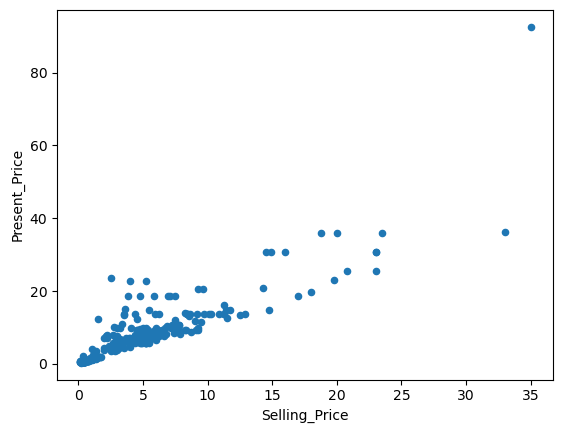

In [44]:
df.plot.scatter(x='Selling_Price',y='Present_Price')

/Users/sauravsharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

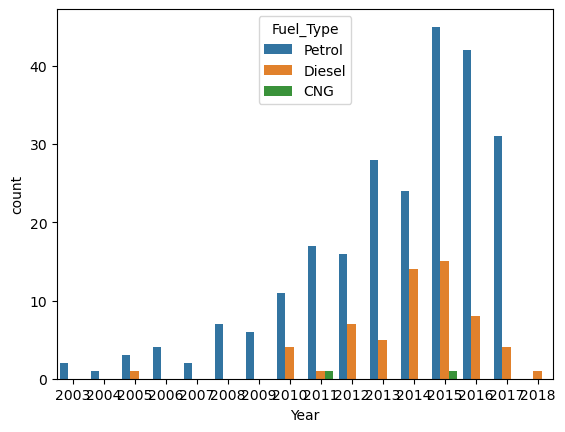

In [46]:
sns.countplot('Year',hue='Fuel_Type',data=df)

In [47]:
#Selling of petrol car and bike car more than diesel and cng

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

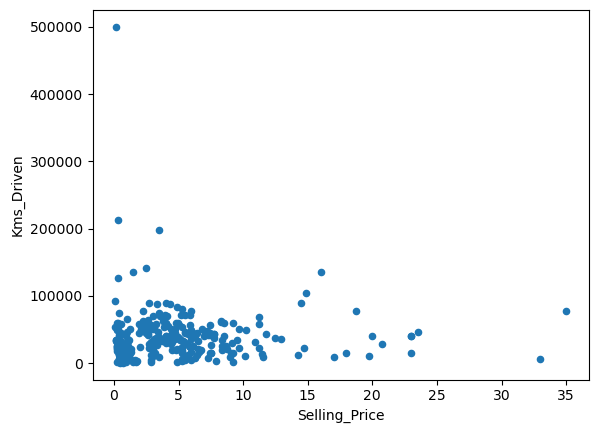

In [48]:
df.plot.scatter('Selling_Price','Kms_Driven')

In [49]:
#vehchile which are less driven have high price

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

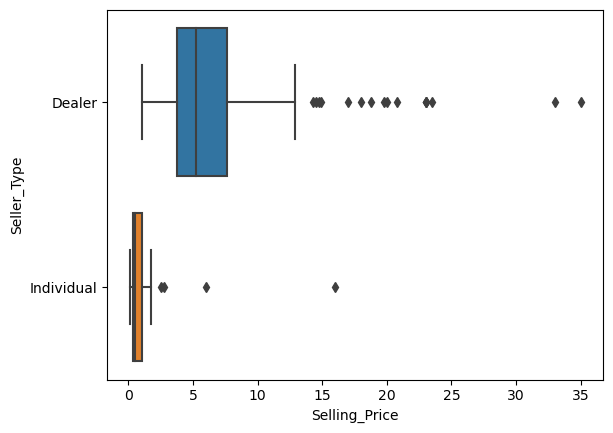

In [50]:
sns.boxplot(x='Selling_Price',y='Seller_Type',data=df)

In [51]:
#we have some outlier dealer category

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

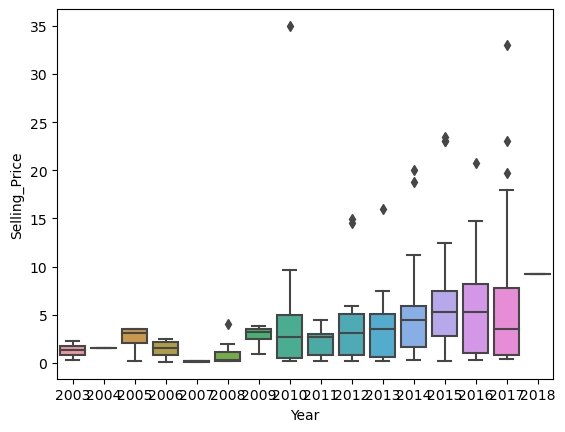

In [52]:
sns.boxplot(y='Selling_Price',x='Year',data=df)

In [59]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

## Data Cleaning

In [60]:
#As car name column has many unique value and an we cannot categorize it so we need to drop it

In [61]:
df.drop('Car_Name',axis=1,inplace=True)

In [62]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
#converting year column into year for which car used
df['curryear']=2023
df['Year']=df.curryear-df.Year
df.drop(['Year','curryear'],axis=1,inplace=True)

In [64]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [67]:
#checking categorical coloumn
categorical_col = df.select_dtypes(include='object')
categorical_col.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [68]:
#3 categorical column we have

## Data Preparation

In [69]:
#creating dummies for categorical column

In [70]:
df = pd.get_dummies(df,drop_first=True)

In [71]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1


<AxesSubplot:>

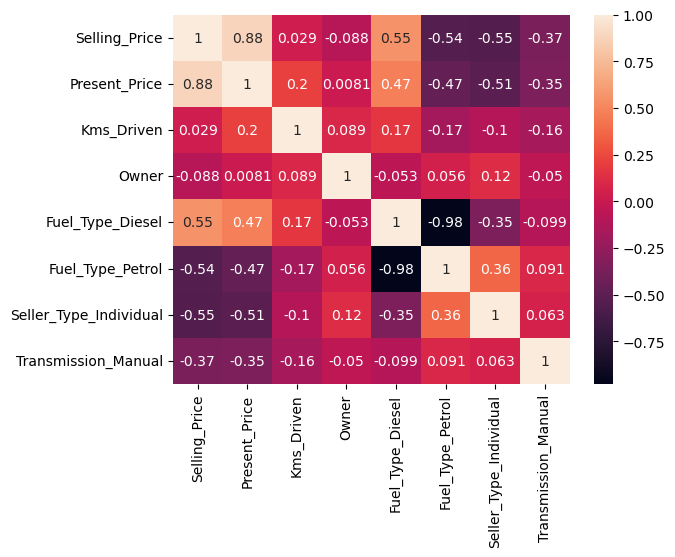

In [72]:
#checking coorelation 
sns.heatmap(df.corr(),annot=True)

# We can see that present price  is more correlated to selling price

In [73]:
#seprating dependent and independent column
X = df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [74]:
print(X.shape)
print(y.shape)

(301, 7)
(301,)


In [75]:
import sklearn

In [89]:
#train test split
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

## Model

In [90]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9275587930461173

## Error calculation

In [ ]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test,))
print('MSE :', metrics.mean_squared_errorea(y_test,))
printnt('RMSE :', np.sprt(metrics.mean_squared_errorea(y_test,)))